### Feladatok

 0. Adathalmaz betöltése (felvezetés)

In [83]:
import seaborn as sns
df = sns.load_dataset("titanic")
df = df.dropna(subset=["age", "fare", "sex", "pclass"])  # egyszerűsítés


A Titanic dataset az egyik legismertebb és leggyakrabban használt tanuló adathalmaz az adatelemzés és gépi tanulás oktatásában. Az adatok az 1912-ben elsüllyedt Titanic hajó utasairól szólnak, és azt tartalmazzák, hogy ki élte túl a katasztrófát és ki nem – valamint számos egyéb jellemzőt is az utasokról.

Titanic dataset – Változók áttekintése

| Oszlopnév     | Jelentés |
|---------------|----------|
| `survived`    | Túlélte-e az utas? (0 = nem, 1 = igen) **Célváltozó** |
| `pclass`      | Utazási osztály (1 = első, 2 = második, 3 = harmadik) |
| `sex`         | Neme (male / female) |
| `age`         | Életkor |
| `sibsp`       | Hány testvérrel / házastárssal utazott |
| `parch`       | Hány szülővel / gyermekkel utazott |
| `fare`        | Jegy ára |
| `embarked`    | Honnan szállt fel az utas? (C = Cherbourg, Q = Queenstown, S = Southampton) |
| `class`       | Jegy osztálya szövegesen (First, Second, Third) |
| `who`         | Az utas típusa: man, woman vagy child |
| `deck`        | Kabinszint (pl. A, B, C... ha ismert) |
| `alone`       | Egyedül utazott-e? (True / False) |


### 1. Feladat – Vizualizáció klaszterezés nélkül

Cél: Nézd meg, hogy milyen kapcsolat lehet az életkor, a viteldíj és az osztály között!
- Készíts scatter plotot, ahol:
- x = age, y = fare

Színezd meg a pontokat a pclass vagy survived alapján

Kérdés:
- Látszik valamilyen mintázat az életkor és jegyár alapján?

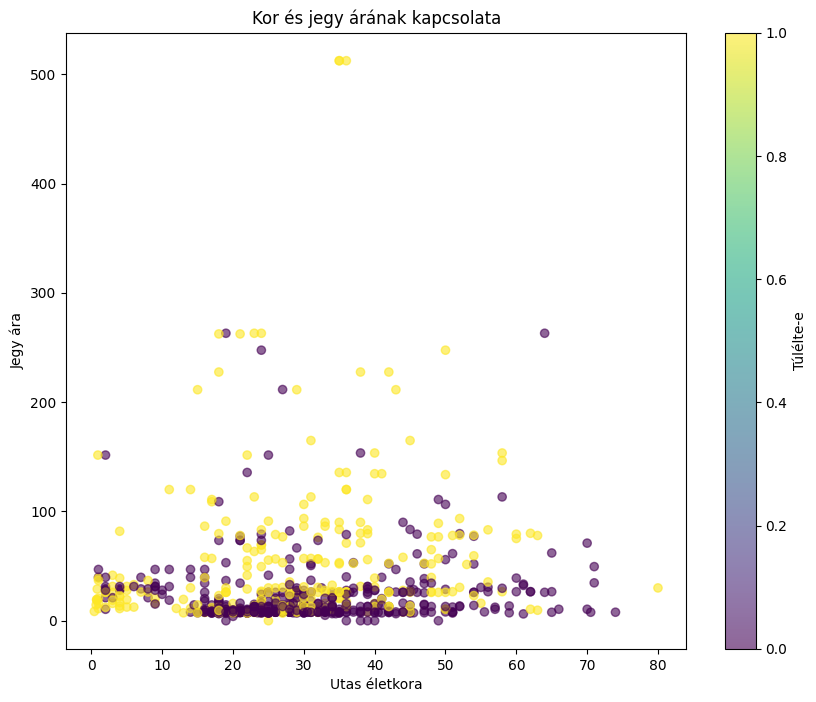

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


plt.figure(figsize=(10,8))
scatter = plt.scatter(
                        df["age"],
                        df["fare"],
                        c=df['survived'],
                        cmap='viridis',
                        alpha=0.6
                    )

plt.xlabel("Utas életkora")
plt.ylabel("Jegy ára")
plt.title("Kor és jegy árának kapcsolata")
cbar = plt.colorbar(scatter)
cbar.set_label('Túlélte-e')

plt.show()

### 2. Feladat – Klaszterek keresése PCA nélkül
Cél: Válasszatok feature-párokat (pl. age vs. fare, age vs. pclass, stb.), és próbáljanak értelmezhető klasztereket találni.

- Használj KMeans klaszterezést 2-3 klaszterre:



In [85]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3).fit(df[["age", "fare"]])
df["cluster"] = model.labels_
model2 = KMeans(n_clusters=3).fit(df[["age", "survived"]])
df["cluster2"] = model2.labels_
model3 = KMeans(n_clusters=3).fit(df[["pclass", "fare"]])
df["cluster3"] = model3.labels_

- Majd scatter plot színekkel: hue="cluster"

Kérdés:
- Látható-e, hogy a klaszterek összefüggésben állnak a túléléssel vagy az osztállyal?

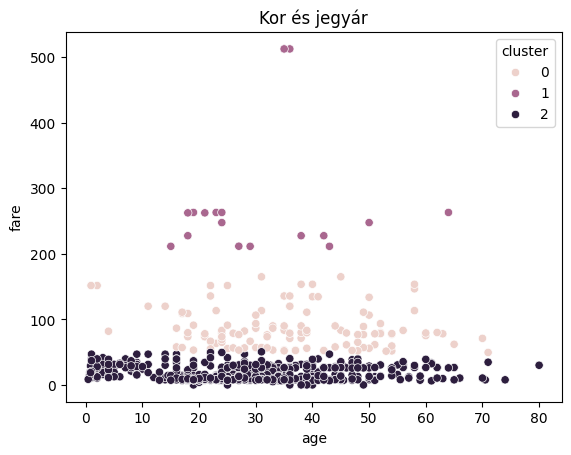

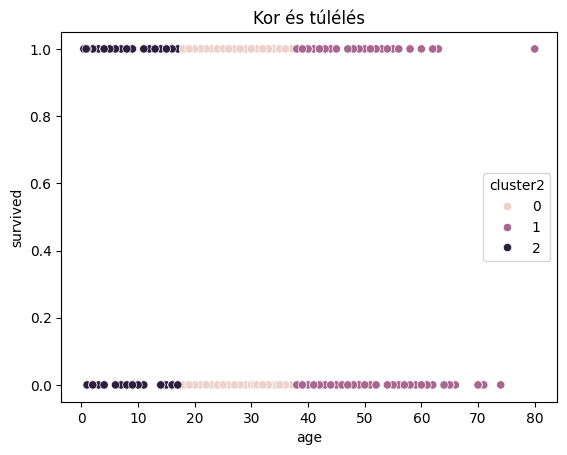

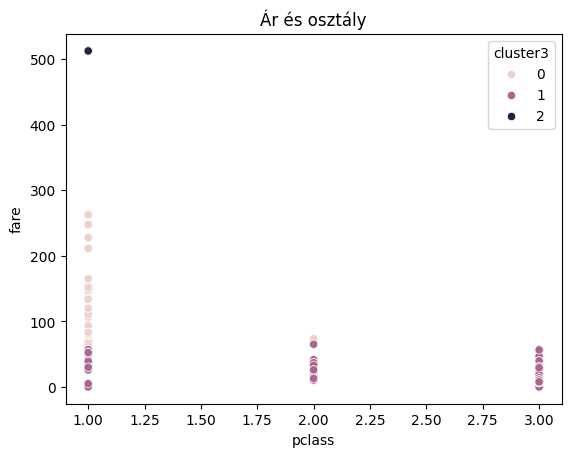

In [86]:
sns.scatterplot(data=df, x="age", y="fare", hue="cluster")
plt.title("Kor és jegyár")
plt.show()

sns.scatterplot(data=df, x="age", y="survived", hue="cluster2")
plt.title("Kor és túlélés")
plt.show()

sns.scatterplot(data=df, x="pclass", y="fare", hue="cluster3")
plt.title("Ár és osztály")
plt.show()


### 3. Feladat – Vizsgáljuk meg a nemek szerinti különbségeket klaszterezéssel
Cél:
- Fedezz-k fel, hogy a nemek külön klasztereket képeznek-e.
- Konvertáld a nemet numerikusra:

In [87]:
df["sex_num"] = df["sex"].map({"male": 0, "female": 1})


- Majd klaszterezés: age, fare, sex_num → KMeans

Kérdés:
- Melyik klaszter tartalmaz több nőt vagy férfit? Melyik éli túl jobban?

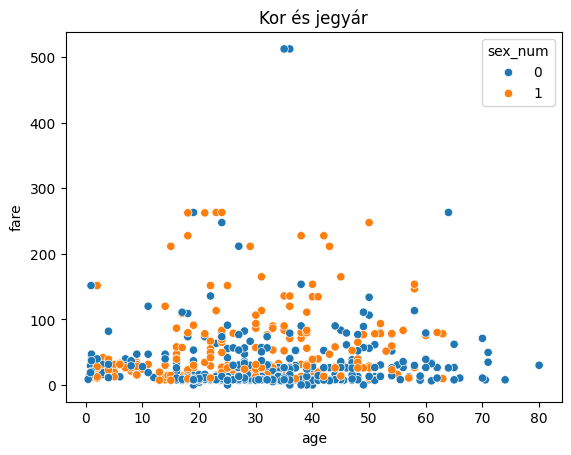

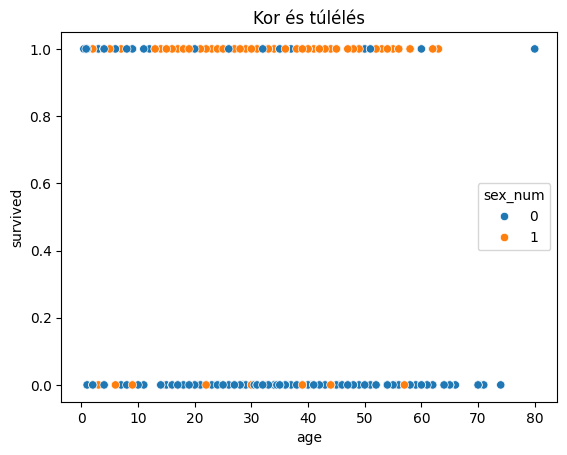

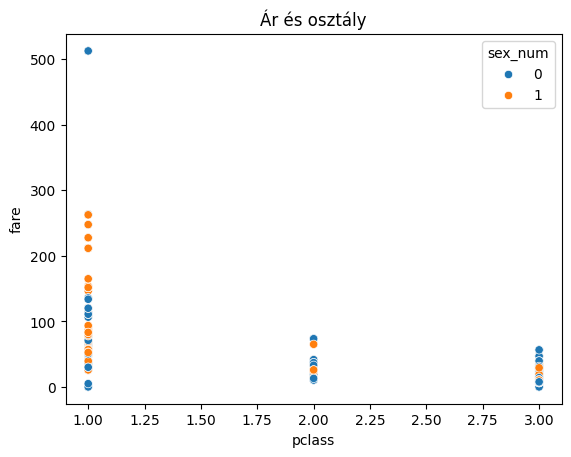

In [88]:
model = KMeans(n_clusters=3).fit(df[["age", "fare", "sex_num"]])
df["cluster"] = model.labels_
model2 = KMeans(n_clusters=3).fit(df[["age", "survived", "sex_num"]])
df["cluster2"] = model2.labels_
model3 = KMeans(n_clusters=3).fit(df[["pclass", "fare", "sex_num"]])
df["cluster3"] = model3.labels_

sns.scatterplot(data=df, x="age", y="fare", hue="sex_num")
plt.title("Kor és jegyár")
plt.show()
sns.scatterplot(data=df, x="age", y="survived", hue="sex_num")
plt.title("Kor és túlélés")
plt.show()
sns.scatterplot(data=df, x="pclass", y="fare", hue="sex_num")
plt.title("Ár és osztály")
plt.show()

### 4. Feladat – Klaszterek értelmezése statisztikával
Cél:
- Miután kész klaszterezés történt, értelmezzük a klaszterek tartalmát.
- Csoportosítsd a df-et cluster szerint és nézd meg az átlagos age, fare, survived értékeket:

In [89]:
df.groupby("cluster")[["age", "fare", "survived"]].mean()

,age,fare,survived
cluster,,,
0,35.916000,85.271841,0.700000
1,31.166667,285.381483,0.777778
2,28.358073,16.323603,0.333333


Kérdés:
- Milyen típusú utasokat csoportosított a modell egy klaszterbe? Melyik csoport túlélési aránya a legjobb?

In [90]:
masodik = df.groupby("cluster2")[["age", "fare", "survived"]].mean()
harmadik = df.groupby("cluster3")[["age", "fare", "survived"]].mean()
display(masodik)
display(harmadik)

,age,fare,survived
cluster2,,,
0,32.293831,34.142152,0.405844
1,16.143213,31.282942,0.425993
2,52.612403,43.338956,0.364341


,age,fare,survived
cluster3,,,
0,28.703125,17.294601,0.339527
1,35.114615,90.352042,0.721154
2,31.166667,285.381483,0.777778


### 5. Feladat – Próbálj ki saját klaszterezést más feature-párokkal
Cél:
- Próbálj ki más kombinációkat (pl. sibsp, parch, fare, pclass), és értelmezd a klasztereket.

- Válassz 2 tetszőleges numerikus feature-t
- Készíts KMeans klasztert
- Vizsgáld meg a survived arányt

Kérdés:
- Mi volt a legérdekesebb kombináció? Talált-e jól elkülönülő klasztert?

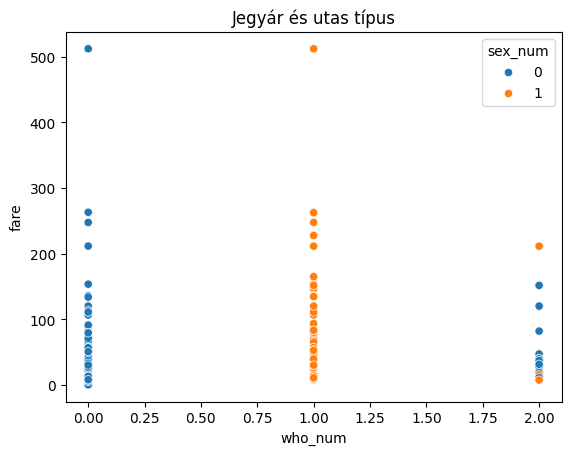

,age,fare,survived
cluster4,,,
0,28.703125,17.294601,0.339527
1,31.166667,285.381483,0.777778
2,35.114615,90.352042,0.721154


In [91]:
df["who_num"] = df["who"].map({"man": 0, "woman": 1, "child": 2})


model4 = KMeans(n_clusters=3).fit(df[["fare", "who_num", "sex_num"]])
df["cluster4"] = model4.labels_

sns.scatterplot(data=df, x="who_num", y="fare", hue="sex_num")
plt.title("Jegyár és utas típus")
plt.show()


df.groupby("cluster4")[["age", "fare", "survived"]].mean()